In [ ]:
import numpy as np
import pandas as pd
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df = pd.read_csv('/content/Restaurant_Reviews.csv', encoding='windows-1252')

In [ ]:
df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
759,The service was poor and thats being nice.,0
760,"Food was good, service was good, Prices were g...",1
761,The place was not clean and the food oh so stale!,0
762,"The chicken dishes are OK, the beef is like sh...",0


Preprocessing and cleaning the reviews

In [ ]:
df.dropna(inplace=True)

In [ ]:
df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
759,The service was poor and thats being nice.,0
760,"Food was good, service was good, Prices were g...",1
761,The place was not clean and the food oh so stale!,0
762,"The chicken dishes are OK, the beef is like sh...",0


In [ ]:
#Change value to predict negative review (i.e 0)

df.loc[df['Liked']<=3,'Liked'] = 0

In [ ]:
#Change value to positive review (i.e 1)

df.loc[df['Liked']>3,'Liked'] = 1

In [ ]:
#Remove stop words

stp_words=stopwords.words('english')
def clean_review(review):
  cleanreview=" ".join(word for word in review.
                       split() if word not in stp_words)
  return cleanreview

df['Review']=df['Review'].apply(clean_review)

In [ ]:
df.head()

,Review,Liked
0,Wow... Loved place.,0
1,Crust good.,0
2,Not tasty texture nasty.,0
3,Stopped late May bank holiday Rick Steve recom...,0
4,The selection menu great prices.,0


Analysis of the Dataset

In [ ]:
df['Liked'].value_counts()

0    764
Name: Liked, dtype: int64

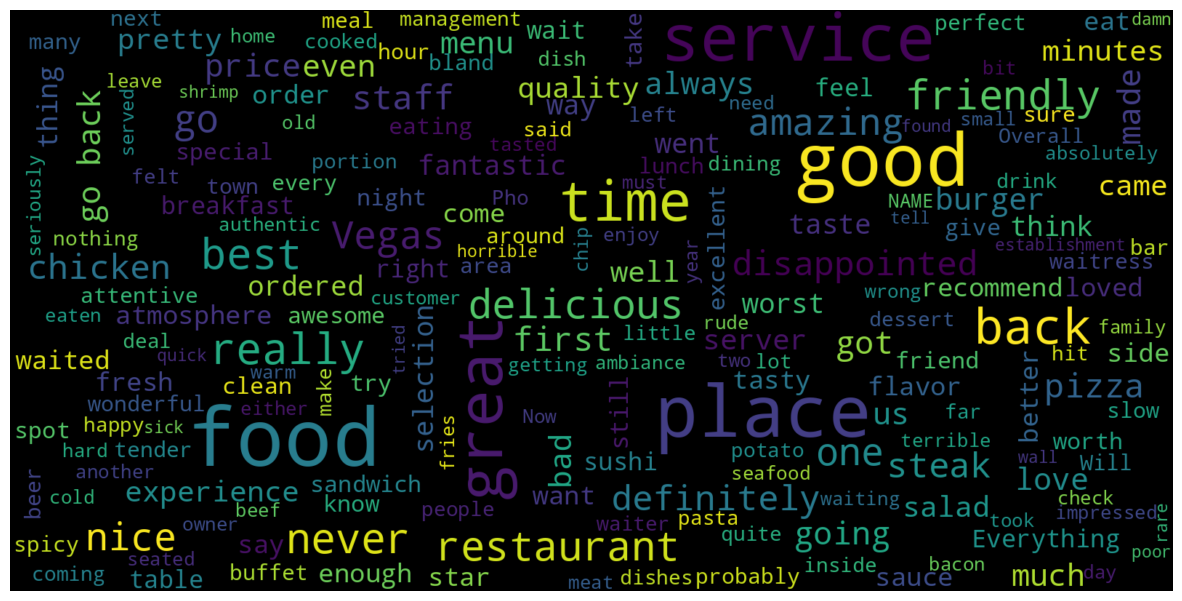

In [ ]:

# Creating Wordcloud of all the words with Liked = 0 i.e negative

consolidated=' '.join(word for word in df['Review'][df['Liked']==0].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
consolidated=' '.join(word for word in df['Review'][df['Liked']==1].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()

ValueError: ignored

<Figure size 1500x1000 with 0 Axes>

In [ ]:
#Analyze Text/Review and based on review identify if its a Positive or a Negative Review.